## PROJET PYTHON POUR LA DATA SCIENCE 2022 💻

## THEME : ANALYSE DES AVIS DES STAGIAIRES ET EMPLOYES DE SOCIETE GENERALE TRANSMIS VIA LA PLATEFORME INDEED.COM ENTRE 2012 ET 2022  

## Auteurs:
* TALEB AHMED Raja
* MAGAJIE WAMSA Berthe Magella
* RENE Léo

## ANALYSE DE DONNEES ET NATURAL LANGUAGE PROCESSING (NLP)

### INTRODUCTION

  ### Contexte et Justification du projet

  Société Générale est l'un des tout premiers groupes européens de services financiers et acteur important de l’économie depuis plus de 150 ans. Au quotidien, 25 millions de clients sont accompagnés grâce à ses plus de 117 000 collaborateurs répartis dans 66 pays. Le groupe Société Générale se positionne en partenaire de confiance pour ses clients, engagé dans le développement durable de l’Afrique, ou bien encore pour l'accompagnement de la transition écologique mondiale. Quatre principales valeurs y sont partagées selon le site officiel du groupe : Esprit d’équipe, Innovation, Responsabilité, Engagement (https://www.societegenerale.com/fr/le-groupe-societe-generale/identite/presentation).  
  
  L’ENSAE Paris a noué des partenariats structurants avec des entreprises visant à améliorer leur visibilité auprès des élèves et à favoriser l’émergence des projets communs. Société Générale fait partie de ces partenaires prestigeux. Avec plus de 600 métiers dans le monde, l’entreprise recrute en effet des talents dans de nombreux secteurs : risques, IT, data, consulting interne, etc. Pour les étudiants ou jeunes diplômés curieux et motivés par les défis d’une grande banque, il s'agirait du cadre adéquat; aussi, sa promesse est d'offrir à tout employé un environnement dans lequel il s'épanouie en développant son potentiel (https://www.ensae.fr/entreprises/devenir-partenaire-de-lensae-paris/nos-partenaires).
  
  Indeed est une plateforme de recherche d'emplois qui permet aux employeurs de publier des offres et aux personnes en quête d'emplois de postuler; aussi des avis sur les entreprises y sont transmis, faisant office de retour d'expérience. Ces avis, s'ils sont bien exploités, peuvent être utiles non seulement aux chercheurs d'emplois dans leur quête, mais aussi aux entreprises pour l'amélioration du quotidien de leurs employés. 

  ### Objectifs
  
L'objectif général de ce projet est d'évaluer la Société Générale au travers des retours d'expériences et avis de ceux qui y ont travaillé et ceux qui y travaillent encore. Plus spécifiquement, il s'agit de:
   * Décrire les avis transmis sur Indeed selon plusieurs critères;
   * Présenter un niveau d'appréciation global;
   * Ressortir les préoccupations les plus fréquentes;
   * Analyser les potentiels facteurs qui influencent le niveau d'appréciation des employés et stagiaires. 

  ### Méthodologie du projet

Afin d'atteindre les objectifs énoncés ci-dessus, nous avons utilisé les méthodes suivantes:

   - Web-Scrapping :
Pour constituer notre base de données, nous avons extrait des données structurées sur le Web de manière automatisée; autrement dit, nous avons usé du webscrapping sur le site Indeed.com.

   - NLP (Natural Language Processing):
C'est une méthode à l’intersection du Machine Learning et de la linguistique ayant pour but d'extraire de l'information et une signification d’un contenu textuel. Nous l'avons utilisée ici pour effectuer de la detection des langues dans les commentaires, les wordclouds, l'analyse sentimentale ainsi que la detection des différentes aspects les plus abordés dans les commentaires (topic modeling).

In [ ]:
#installation des packages nécéssaires
!pip install pandas
!pip install langdetect 
!pip install wordcloud
!pip install nltk
!pip install  gensim
!pip install vaderSentiment
!pip install textblob
!pip install vaderSentiment-fr
!pip install deep-translator
!pip install yellowbrick

In [ ]:
# Importation des packages utiles
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline
import seaborn as sns
import numpy as np

### I- TRAITEMENT DES DONNEES

In [ ]:
# Importation de la base de données
df = pd.read_csv("Database.csv",sep=",")

In [ ]:
# Description de la base de données initiale
print("Il y a", len(df), "individus dans notre base de données.")
print(df.columns)
df.sample(3)

Il y a 2520 individus dans notre base de données.
Index(['Country', 'rating', 'contract', 'is_employed', 'job', 'city', 'date',
       'comment'],
      dtype='object')


,Country,rating,contract,is_employed,job,city,date,comment
404,France,4.0,NaN,False,"Team Leader, Coordinateur",Seclin (59),2020,Bonne ambiance au sein de la société.\nBon esp...
210,France,2.0,NaN,False,Conseiller clientèle,Marseille (13),2021,15 ans passés à servir des supérieurs qui n’on...
1089,France,4.0,NaN,False,Assistante commerciale,Lyon (69),2017,Année très agréable et formatrice passée au se...


In [ ]:
#Création d'une copie de la base
df_new = df.copy()

In [ ]:
#Remplacer True et False dans la  colonne is_employed du DataFrame par 1 et 0
df_new['is_employed'] = df_new['is_employed'].replace([True], 1)
df_new['is_employed'] = df_new['is_employed'].replace([False], 0)

In [ ]:
#Vérification types des variables
print(df_new.dtypes)

Country         object
rating         float64
contract        object
is_employed      int64
job             object
city            object
date             int64
comment         object
dtype: object


In [ ]:
#Nombre de modalités pour chacune des variables
df_new.nunique()

Country           3
rating            5
contract          3
is_employed       2
job            1706
city            803
date             11
comment        2518
dtype: int64

In [ ]:
#Vérification valeurs manquantes
df_new.count()

Country        2520
rating         2520
contract        237
is_employed    2520
job            2520
city           2520
date           2520
comment        2520
dtype: int64

La seule variable contenant des valeurs manquantes est "contract" avec seulement 237 valeurs renseignées; Un peu moins du dizième des personnes ont précisé le contrat dans leurs commentaires.

In [ ]:
#Suppression des codes postaux dans la colonne city 
characters = ")(1234567890"
df_new['city'] = df_new['city'].apply(lambda x: x.strip(characters))
df_new.head(3)

,Country,rating,contract,is_employed,job,city,date,comment
0,France,3.0,cdd,0,Conseillère clientèle,Massy,2022,"Bonne équipe, dommage que la direction soit bl..."
1,France,5.0,NaN,0,Responsable,Falaise,2022,"Équipe au top, l'esprit d'équipe fait la force..."
2,France,4.0,NaN,0,Compliance Officer,Nanterre,2022,"bonne ambiance, bonne équipe, bon relationnel,..."


In [ ]:
#Ajustement de la police pour éviter les problèmes liés à la sensibilité à la casse.
df_new['city'] = df_new['city'].apply(lambda x: x.lower())
df_new['comment']=df_new['comment'].apply(lambda x: x.lower())
df_new['job']=df_new['job'].apply(lambda x: x.lower())
df_new.sample(3)

,Country,rating,contract,is_employed,job,city,date,comment
2042,US,5.0,NaN,0,project manager - contract,jersey,2016,fantastic place to work. great work ethic and ...
1109,France,5.0,NaN,0,responsable pmo moa,orléans,2017,partage des valeurs et visions de l'entreprise...
756,France,4.0,stage,0,stagiaire 2 mois,annecy,2018,"super stage au seins de cette entreprise, pers..."


In [ ]:
#Suppression des espaces dans la colonne city
df_new['city'] = df_new['city'].apply(lambda x: str(x).strip(' '))

In [ ]:
# Définition d'une fonction qui permettra de nettoyer nos données textuelles
import re
def clean(texte):
    # Suppression des liens
    for item in re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+").findall(texte):
        texte=texte.replace(item, "")
    # Suppression du retour à la ligne
    texte = texte.replace("\n", " ").replace("\r", "") 
    # Suppression des caractères ",", "!", "?", "%", "(",")","/",'"', "$","£", "_", "-", "+", "*",".", "µ", ":","&,"§" 
    texte = re.sub(r"[,\!\?\%\(\)\/\"\$\£\+\*\µ,\:\&\§]", " ", texte) 
    # Suppression des apostrophes '
    for item in re.compile("([\’])").findall(texte):
        texte=texte.replace(item, " ")
    for item in re.compile("([\'])").findall(texte):
        texte=texte.replace(item, " ")
    # Suppression des points de suspension
    for item in re.compile("([.]{1,5})").findall(texte):
        texte=texte.replace(item, "") 
    # Suppression des adresses mail
    for item in re.findall('\S+@\S+', texte) :
        texte=texte.replace(item, "")
    # Suppression des mots contenant des chiffres
    texte = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", texte)
    # Diviser les mots attachés
    texte = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",texte) if s])
    return texte

In [ ]:
df_new["comment"] = df_new["comment"].apply(lambda x: clean(x))
df_new["city"] = df_new["city"].apply(lambda x: clean(x))
df_new["job"] = df_new["job"].apply(lambda x: clean(x))
df_new.sample(3)

,Country,rating,contract,is_employed,job,city,date,comment
2108,US,5.0,NaN,0,analyst alternative investments,new york ny,2013,i worked there for a year and a half in their ...
951,France,4.0,NaN,0,conseillère clientèle multimédia,lyon,2018,grâce à la société générale j ai pu être formé...
1296,France,5.0,NaN,0,consultant en finance,colombes,2017,une entreprise qui ne possède pas beaucoup d â...


In [ ]:
# Ajustement des orthographes des villes
ville = ["défense","bangalore","bengaluru", "paris", "fontenay", "new york", "lyon", "massy", "chicago", "marseille", "orléans", "nanterre"]
def rename_city(texte):
    for s in ville:
        if s in texte :
            texte=s
    if texte in ["bengaluru","banglore"]:
        texte="bangalore"
    return texte

In [ ]:
df_new["city"] = df_new["city"].apply(lambda x: rename_city(x))
df_new.sample(3)

,Country,rating,contract,is_employed,job,city,date,comment
6,France,3.0,NaN,0,chef de projet chargé d études à la stratégi...,défense,2022,-avantages salarié -missions transverses intér...
752,France,5.0,NaN,0,agent de tri postal,la rochelle,2018,cela ne concerne évidemment que le siège de la...
1393,France,4.0,NaN,0,chargé d accueil et assistant conseillé clientèle,argenteuil,2016,la journée au sein de l agence est chargée en ...


In [ ]:
# Ajustement des orthographes des jobs
def rename_job(texte):
    if "stag" in texte :
        texte="stagiaire"
    elif "conseil" in texte and "client" in texte:
        texte="conseiller clientèle"
    elif "chargé" in texte and "client" in texte:
        texte="chargé de clientèle"
    elif "chargé" in texte and "acc" in texte:
        texte="chargé accueil"
    return texte

In [ ]:
df_new["job"] = df_new["job"].apply(lambda x: rename_job(x))

### II- ANALYSE DESCRIPTIVE DES DONNEES

Notre base de données contient 2520 lignes qui représentent les individus et 8 colonnes qui sont nos variables que sont : **'country'** qui renferme le pays concerné (France, US ou Inde), **'rating'** qui renferme les notes attribuées (sur 5), **'contract'** pour le type de contrat(Stage, cdd, cdi),  **'is_employed'** qui prend la valeur 1 si l'individu travaille au sein de la SG au moment du commentaire et 0 sinon, **'job'** pour le poste occupé, **'city'** pour le lieu de travail (la ville) , **'date'** pour l'année de publication du commentaire et **'comment'** pour les commentaires.

In [ ]:
#Statistiques sommaires sur les notes attribuées
df_new['rating'].describe()

count    2520.000000
mean        3.806746
std         1.089283
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

La plus petite note attribuée est 1 et la plus grande est 5 (Evaluation sur 5). En moyenne, la SG est appréciée par ceux qui y ont travaillé (ou qui y travaillent) avec une note moyenne de 3,8. De plus, seulement 25% des individus ont attribué une note inférieure à 3.

In [ ]:
#Effectifs pour chaque modalité de la variable rating 
df_new['rating'].value_counts()

4.0    985
5.0    738
3.0    501
2.0    164
1.0    132
Name: rating, dtype: int64

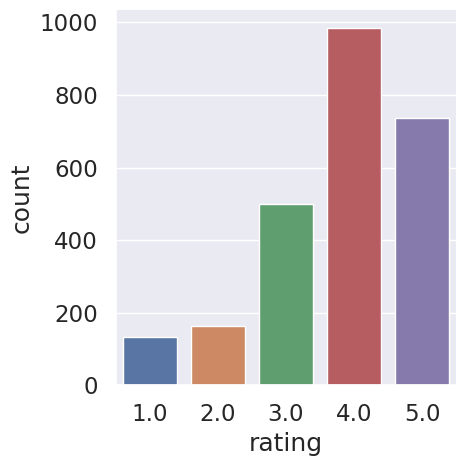

In [ ]:
sns.catplot(data=df_new, x='rating', kind='count')
plt.show()

La note la plus attribuée est 4 et la moins attribuée est 1. 

In [ ]:
#Effectifs pour chaque modalité de la variable is_employed
df_new['is_employed'].value_counts()

0    1885
1     635
Name: is_employed, dtype: int64

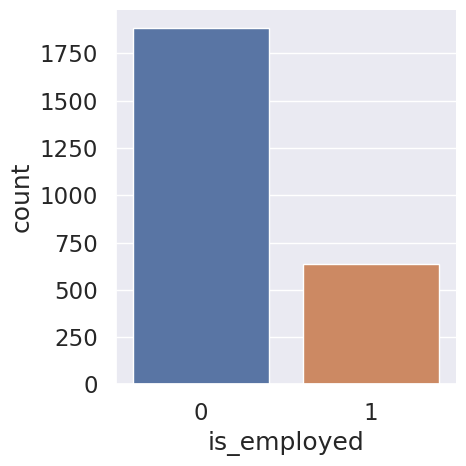

In [ ]:
sns.catplot(data=df_new, x='is_employed', kind='count')
plt.show()

Les individus ne travaillant plus au sein de la SG au moment du commentaire (is_employed=0) sont trois fois plus nombreux que ceux en emploi à ce moment.

In [ ]:
#Effectifs pour chaque modalité de la variable contract 
print(df_new['contract'].count())
df_new['contract'].value_counts()

237


stage    210
cdd       21
cdi        6
Name: contract, dtype: int64

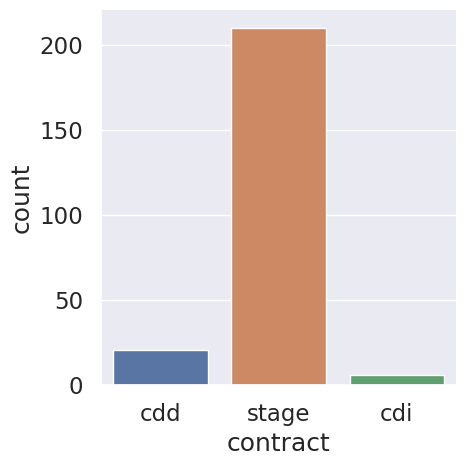

In [ ]:
sns.catplot(data=df_new, x='contract', kind='count')
plt.show()

Seuls 237 individus de notre base ont précisé leur contrat de travail au sein de la SG et ce sont en grande majorité des stagiaires.

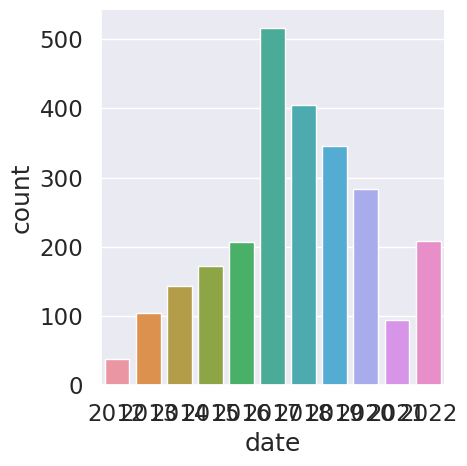

In [ ]:
sns.catplot(data=df_new, x='date', kind='count')
plt.show()

Les avis ont été transmis en plus grand nombre en 2017; on note une tendance du nombre de commentaires à la hausse entre 2012 et 2017 et une tendance à la baisse jusqu'en 2021.

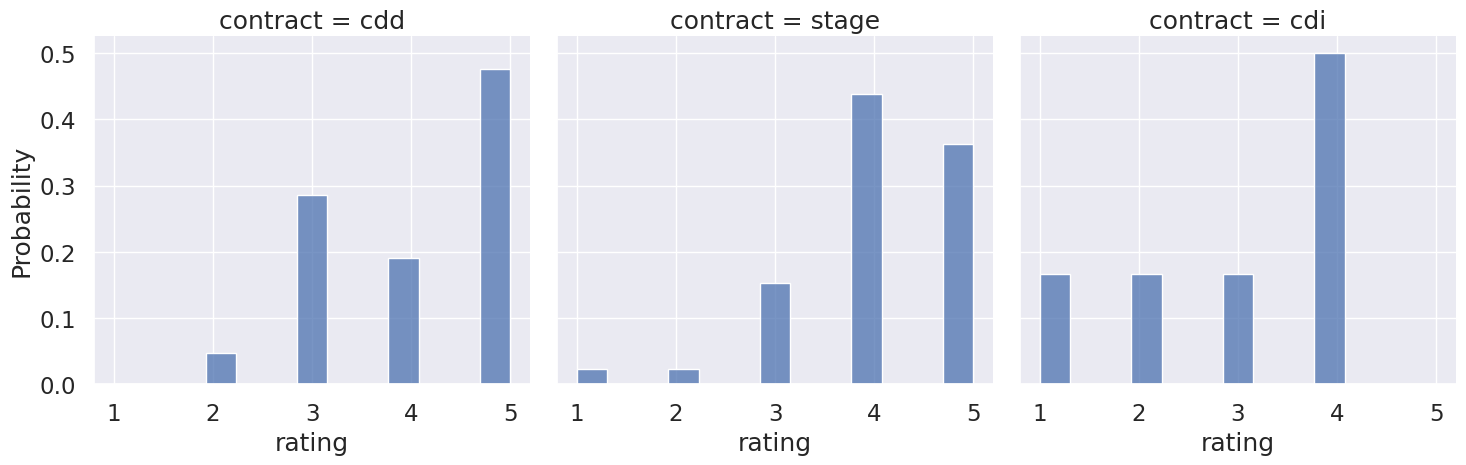

In [ ]:
sns.displot(data=df_new, x='rating', col='contract', kind='hist', stat='probability', common_norm=False)

Les personnes en cdd ont été les mieux satisfaites de leur expérience au sein de la SG compte tenu des notes attribuées. En effet, la majorité d'entre elles a attribué une note de 5/5 et aucune d'entre elles n'a attribué une note inférieure à 2/5. Quant aux personnes en cdi, on note une part relativement importante de personnes ayant attribué une note inférieure à 2. Les stagiaires quant à eux sont majoritairement satisfaits avec une part faible de notes inférieures à 2.

<AxesSubplot: xlabel='rating', ylabel='contract'>

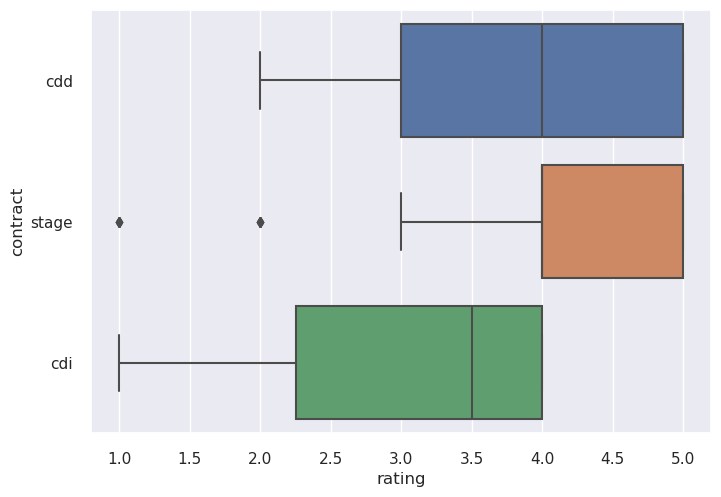

In [ ]:
sns.boxplot(data=df_new, x='rating', y='contract')

<AxesSubplot: >

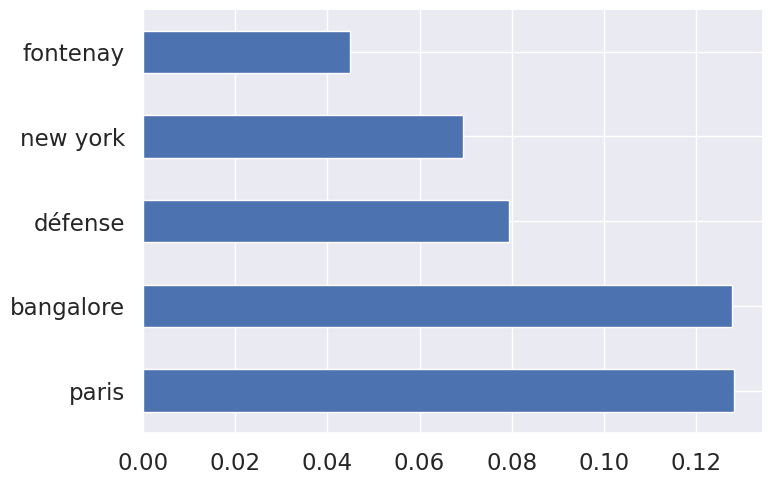

In [ ]:
#Top 5 des villes les plus mentionnées
sns.set_theme(font_scale=1.5)
cities = df_new['city'].value_counts(normalize=True)
top_cities = cities.nlargest(5)
top_cities.plot(kind='barh', legend=False)

<AxesSubplot: xlabel='rating', ylabel='city'>

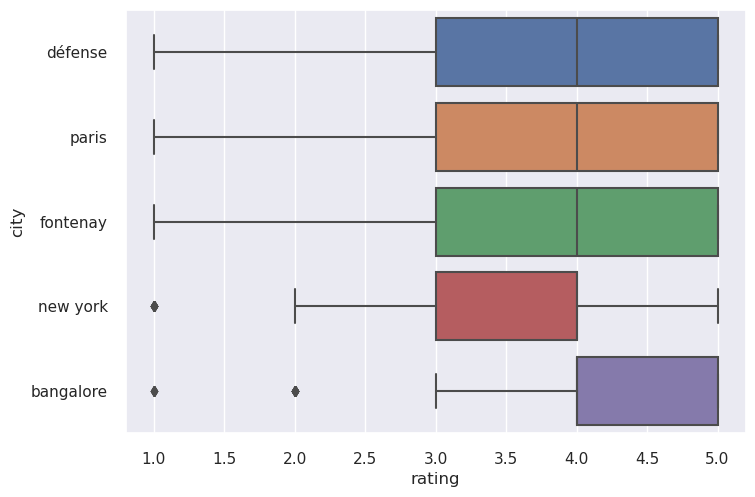

In [ ]:
top_cities_index = [city in top_cities.index for city in df_new['city']]
sub_df = df_new[top_cities_index]
sns.boxplot(data=sub_df, x='rating', y='city')

Il ressort de ce graphique que les notes attribuées selon les 5 lieux de travail les plus mentionnés sont supérieures à 3 donc les individus ont été satisfaits dans ces lieux.

<AxesSubplot: >

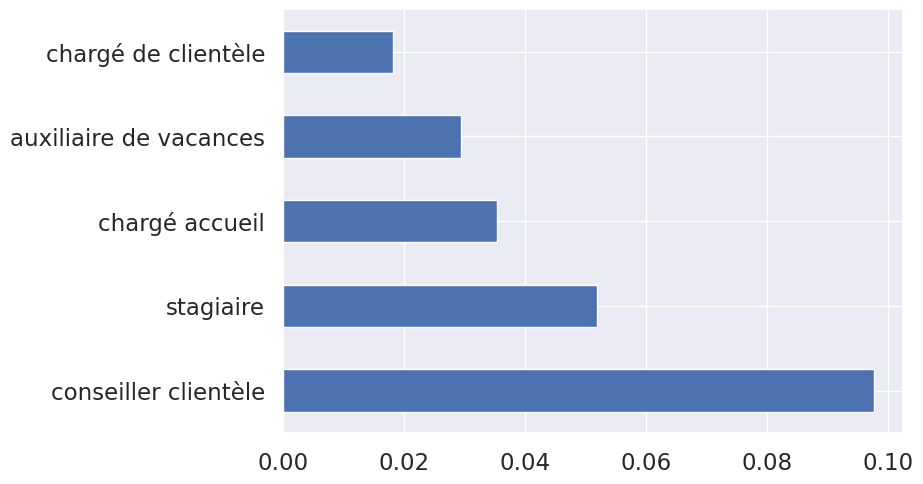

In [ ]:
#Top 5 des postes les plus mentionnés
sns.set_theme(font_scale=1.5)
jobs = df_new['job'].value_counts(normalize=True)
top_jobs = jobs.nlargest(5)
top_jobs.plot(kind='barh', legend=False)

/tmp/ipykernel_8496/1639863647.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


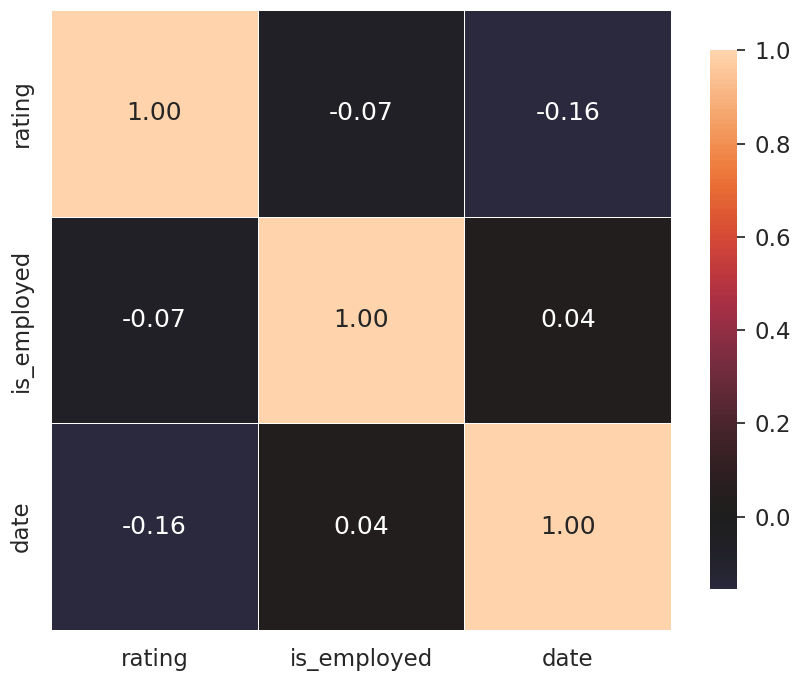

In [ ]:
def correlation_heatmap(data):
    correlations = data.corr()
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70})
    plt.show()
correlation_heatmap(df_new)

On remarque qu'il n'y a pas de corrélation importante entre nos variables.

In [ ]:
df_new.head()

,Country,rating,contract,is_employed,job,city,date,comment
0,France,3.0,cdd,0,conseiller clientèle,massy,2022,bonne équipe dommage que la direction soit bl...
1,France,5.0,NaN,0,responsable,falaise,2022,équipe au top l esprit d équipe fait la force...
2,France,4.0,NaN,0,compliance officer,nanterre,2022,bonne ambiance bonne équipe bon relationnel ...
3,France,5.0,NaN,0,assistante administrative,saint-dié-des-vosges,2022,missions variées solidarité dans l équipe et ...
4,France,4.0,NaN,0,chargée de communication,défense,2022,première expérience professionnelle durant an...


### III- NATURAL LANGUAGE PROCESSING (NLP)

In [ ]:
#Installation des packages nécessaires
!pip install langdetect 
!pip install wordcloud
!pip install nltk
!pip install  gensim
!pip install vaderSentiment
!pip install textblob
!pip install vaderSentiment-fr
!pip install deep-translator
!pip install yellowbrick

In [ ]:
#Importation des librairies nécessaires

from langdetect import detect # pour détecter les langues
import sklearn as sk
from wordcloud import WordCloud # pour gérer les nuages de mots
from deep_translator import GoogleTranslator 

#stopword français
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords') 

# stopword anglais
import gensim 
from gensim.parsing.preprocessing import STOPWORDS 

#from gensim import corpora

from PIL import Image # pour personaliser la forme du wordcloud

# Pour l'analyse des sentiments
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SenEN
analyzer = SenEN()

#Pour les classements des mots les plus fréquents
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/onyxia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### 1) Détection des langues

In [ ]:
# Fonction pour détecter les langues utilisées
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [ ]:
df_new['langues']=df['comment'].apply(language_detection)
print(f"Les commentaires sont rédigés en {len(df_new.langues.unique())} langues distinctes")
df_new['langues'].value_counts()

Les commentaires sont rédigés en 7 langues distinctes


fr    1729
en     780
es       5
pt       3
it       1
tr       1
da       1
Name: langues, dtype: int64

La majorité est en Français. Nous pouvons mieux visualiser à l'aide du graphique ci-dessous.

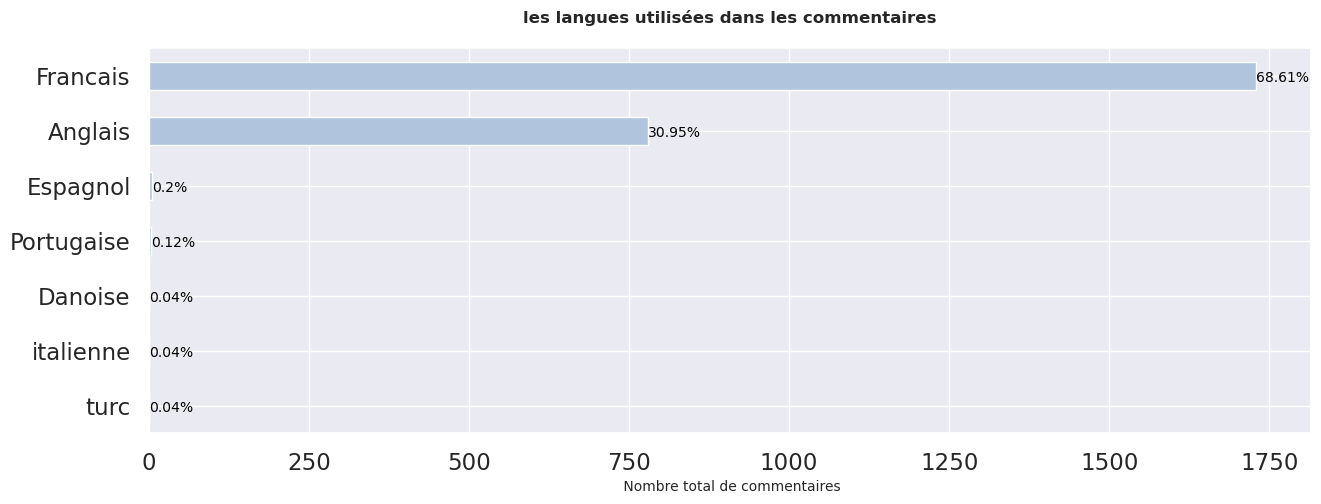

In [ ]:
ax=df_new['langues'].value_counts().sort_values(ascending=False).plot(kind='barh',figsize=(15,5),color='lightsteelblue')
ax.set_title("les langues utilisées dans les commentaires\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Nombre total de commentaires", fontsize=10)
ax.set_yticklabels(['Francais','Anglais','Espagnol', 'Portugaise','Danoise','italienne','turc'])
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')
ax.invert_yaxis()

La majorité des commentaires est en français (68,61%) suivi de l'anglais (30.95%). Nous allons à présent nous concentrer sur les commentaires écrits en ces deux langues.

In [ ]:
#Création d'un nouveau dataframe contenant uniquement les commentaires et les langues
df_comment = df_new.drop(['Country','rating','contract','is_employed','job','date','city'], axis= 1)

In [ ]:
# Suppression des accents dans les commentaires
import unidecode
df_comment["comment"] = df_comment["comment"].apply(lambda x: unidecode.unidecode(x))

In [ ]:
df_comment_fr = df_comment[df_comment['langues'] == 'fr']
df_comment_ang = df_comment[df_comment['langues'] == 'en']

#### Stop words

Pour créer les wordclouds, il est important d'extraire du texte certains mots qui pourraient ne pas avoir d'importance pour l'analyse. Le package gensim nous a fourni les Stop-words anglais et les stop-words francais proviennent du package nltk. Ces derniers ont été enrichis par d'autres stop-words que nous avons défini.

In [ ]:
irrelevent = 'evaluez votre entreprise pour afficher tous les avis points positifs negatifs tres plus cette prendre fait membres superieurs parler trade pleine chantiers champs passé agence societe envers ecoute banque rien gens comme essaie particuliere emploi directrice entre different banking employer travaillait travail travaille apprendre aidant direction work toujours entreprise professionnel prendre salaire agence direction emploi banque lot people client thing overall employee place bank opportunity SG year day etait utilisant choses things years mumbai aussi indiennes monde services forces plusieurs banques passe etais commerciales commerciale etaient etait salaries val a l d n fontenay participer participe '.split(' ')
stop_word_fr = set(stopwords.words('french'))
stop_word_fr.update(irrelevent)
stop_word_en =set(STOPWORDS)
stop_word_en.update(irrelevent)

#### Construction du WordCloud

In [ ]:
def plot_wordcloud(df, langue, stop_word_fr):
    wordcloud=WordCloud(max_font_size=None, max_words=50, background_color="white", stopwords=stop_word_fr, random_state=42, width=500, height=500).generate(str(df.values))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.title(langue + ' comment\n', fontsize=25, fontweight='bold')
    plt.show()

#### WordCloud des commentaires en francais

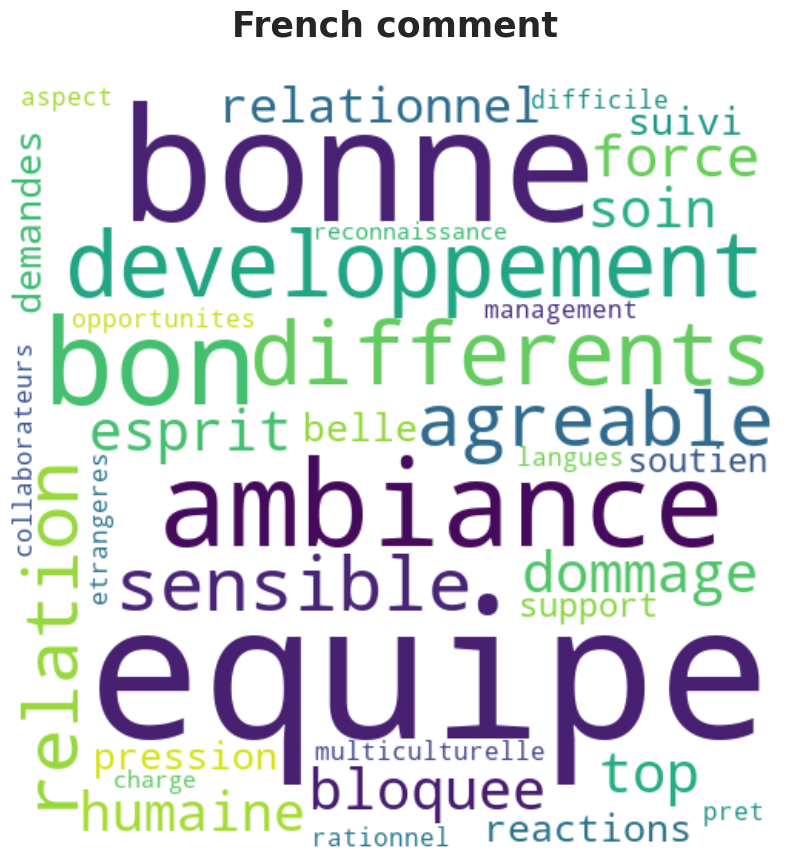

In [ ]:
plt.figure(figsize=(12, 10))
plot_wordcloud(df_comment_fr['comment'], "French",stop_word_fr)
plt.show()

#### WordCloud des commentaires en Anglais

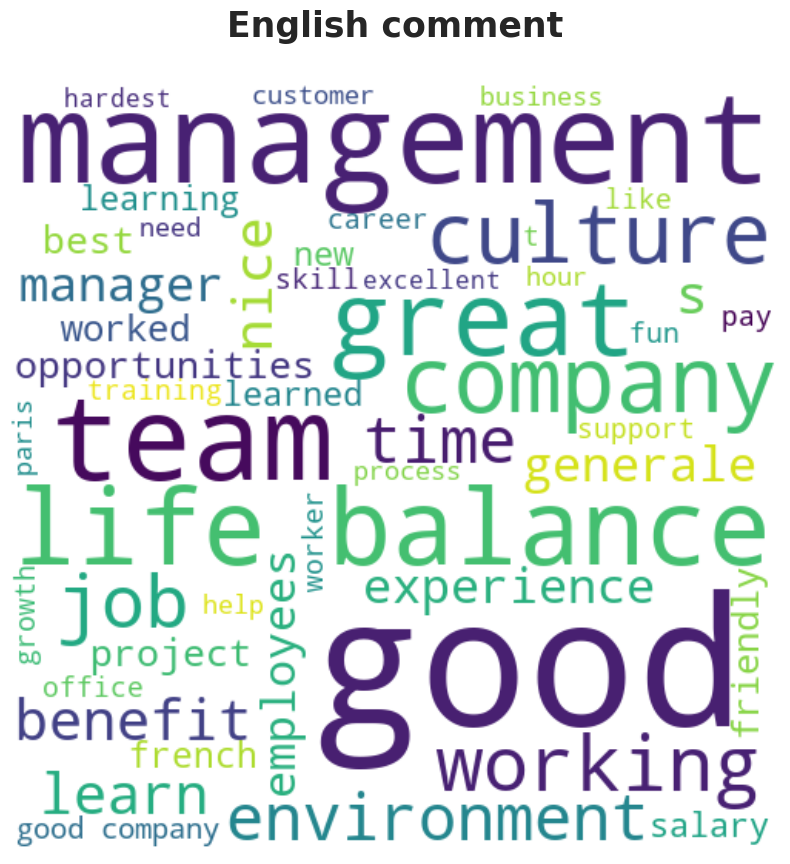

In [ ]:
plt.figure(figsize=(12, 10))
plot_wordcloud(df_comment_ang['comment'], "English",stop_word_en)
plt.show()

### Analyse sentimentale des commentaires

L'analyse des sentiments consiste essentiellement à juger le sentiment qui se cache derrière un écrit. Elle consiste à prendre un morceau de texte, qu'il s'agisse d'une phrase ou d'un article complet, et à analyser l'émotion que l'auteur exprime. Dans notre analyse, nous allons calculer pour chaque commentaire, le score de sentiment positif, négatif ou neutre qu'il exprime. Nous classerons ensuite chaque commentaire en fonction du sentiment positif, négatif ou neutre.

**Le score de sentiment** indique la probabilité de la nature d'un sentiment exprimé à travers un commentaire.

La bibliothèque VADER renvoie 4 valeurs telles que :

**pos**: La probabilité que le sentiment soit positif

**neu**: La probabilité que le sentiment soit neutre

**neg**: La probabilité que le sentiment soit négatif

**compound**: Le score composé et qui prend des valeurs de -1 à 1

#### Score de sentiment pour les commentaires en Français

In [ ]:
df_comment_fr['negatif_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df_comment_fr['neutral_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df_comment_fr['positif_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df_comment_fr['compound_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df_comment_fr.head()

#### Score de sentiment pour les commentaires en Anglais

In [ ]:
df_comment_ang['negatif_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df_comment_ang['neutral_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df_comment_ang['positif_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df_comment_ang['compound_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df_comment_ang.head()

In [ ]:
# scores pour l'anglais et francais
base=pd.concat([df_comment_fr,df_comment_ang])

In [ ]:
def histogram(df):
    fig, axes = plt.subplots(2, 2, figsize=(10,8))
    df.hist('negatif_feeling', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
    axes[0,0].set_title('Negative Sentiment Score')
    df.hist('neutral_feeling', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
    axes[0,1].set_title('Neutral Sentiment Score')
    df.hist('positif_feeling', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
    axes[1,0].set_title('Positive Sentiment Score')
    df.hist('compound_feeling', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
    axes[1,1].set_title('Compound')
    fig.text(0.5, 0.04, 'Scores de sentiment',  fontweight='bold', ha='center')
    fig.text(0.04, 0.5, 'Nombre de commentaires', fontweight='bold', va='center', rotation='vertical')
    plt.suptitle('Analyse sentimentale des employées de SG \n\n', fontsize=12, fontweight='bold');

In [ ]:
#Evolution des sentiments par année
sns.set_theme(font_scale=1)
sns.displot(data=df_new, x='date', hue='rating', kind='kde',common_norm=False)

On reindexe le tableau et on supprime toute les commentaires qui ne sont pas en anglais ou en francais . Cela va nous permettre de mettre que de l'analyse de sentiment sur des texte en anglais ou en francais , ce qui facilite le traitement avec nltk.

In [ ]:
#Reindexer le tabeleau avec une colonne ID

df_new['ID']= df_new.index
df.head()

#Supprimer les ligne ou langue n'est pas francais et anglais
L = ["es","pt","no","sl","tr"]
for i in L :
    df_new.drop(df_new[df_new['langues']==i].index,inplace =True)

df_new['langues'].value_counts()

fr    1712
en     786
ca       5
it       3
de       1
af       1
cy       1
Name: langues, dtype: int64

In [ ]:
print(df_new.loc[7][7])

 bonne opportunité pour un job d'été. contrat en intérim avec bonne rémunération et tickets resto. repas gratuits


On étudie que le tableau avec les commentaires en anglais

In [ ]:
# tableaux avec que les commentaires en anglais 

dfen = df_new[df_new['langues']=='en']
dfen.head(4)

,Country,rating,contract,is_employed,job,city,date,comment,clean_comment,clean_city,clean_job,langues,ID
56,France,5.0,NaN,0,chargée de clientèle,paris,2022,ras tout etait ok rien a dire a recommander s...,ras tout etait ok rien a dire a recommander sa...,paris,chargée de clientèle,en,56
103,France,4.0,stage,1,internal communication trainee,paris,2022,"good relations in the teams, kind and attenti...",good relations in the teams kind and attentiv...,paris,internal communication trainee,en,103
218,France,5.0,NaN,0,contracts manager,"la défense, paris",2021,"french leader in derivative products, societe...",french leader in derivative products societe ...,la défense paris,contracts manager,en,218
251,France,4.0,NaN,0,dealer service support coordinator,service centre,2020,"great place to work, management are supportiv...",great place to work management are supportive...,service centre,dealer service support coordinator,en,251
260,France,4.0,NaN,0,trade finance officer,"paris, france",2020,good balance between personal life and job. i...,good balance between personal life and job int...,paris france,trade finance officer,en,260


In [ ]:
#Analyse NLP
from tqdm.notebook import tqdm

sia = SenEN()
res = {}
for i , rows in tqdm(dfen.iterrows(), total = len(dfen)):
    texte = rows['comment']
    myid = rows['ID']
    res[myid]= sia.polarity_scores(texte)

vaders = pd.DataFrame(res).T
vaders.reset_index()
vaders['ID']= vaders.index
vaders.head()


  0%|          | 0/786 [00:00<?, ?it/s]

,neg,neu,pos,compound,ID
56,0.354,0.472,0.173,-0.3182,56
103,0.000,0.437,0.563,0.8910,103
218,0.000,0.667,0.333,0.9552,218
251,0.035,0.599,0.366,0.9670,251
260,0.032,0.874,0.094,0.4317,260


In [ ]:
#Jointure des tableaux
vaders = vaders.merge(dfen,how='left')
vaders.head()

,neg,neu,pos,compound,ID,Country,rating,contract,is_employed,job,city,date,comment,clean_comment,clean_city,clean_job,langues
0,0.354,0.472,0.173,-0.3182,56,France,5.0,NaN,0,chargée de clientèle,paris,2022,ras tout etait ok rien a dire a recommander s...,ras tout etait ok rien a dire a recommander sa...,paris,chargée de clientèle,en
1,0.000,0.437,0.563,0.8910,103,France,4.0,stage,1,internal communication trainee,paris,2022,"good relations in the teams, kind and attenti...",good relations in the teams kind and attentiv...,paris,internal communication trainee,en
2,0.000,0.667,0.333,0.9552,218,France,5.0,NaN,0,contracts manager,"la défense, paris",2021,"french leader in derivative products, societe...",french leader in derivative products societe ...,la défense paris,contracts manager,en
3,0.035,0.599,0.366,0.9670,251,France,4.0,NaN,0,dealer service support coordinator,service centre,2020,"great place to work, management are supportiv...",great place to work management are supportive...,service centre,dealer service support coordinator,en
4,0.032,0.874,0.094,0.4317,260,France,4.0,NaN,0,trade finance officer,"paris, france",2020,good balance between personal life and job. i...,good balance between personal life and job int...,paris france,trade finance officer,en


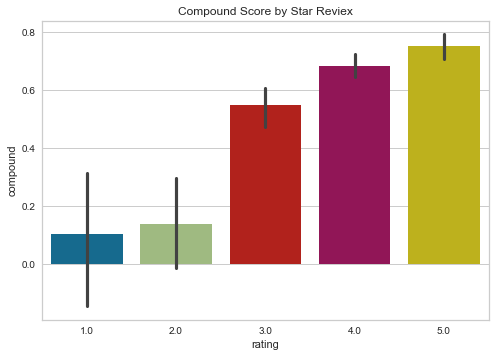

In [ ]:

ax = sbn.barplot(data = vaders , x = 'rating', y = 'compound')
ax.set_title('Compound Score by Star Review')
plt.show()

Les notes sont proportielles à la variable coumpound puisque moins le sentiment est posiitif moins la note sera haute 

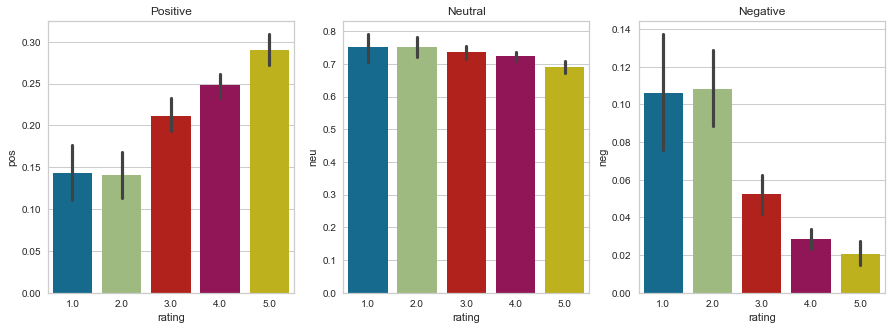

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
sbn.barplot(data=vaders , x ='rating', y='pos' , ax =axs[0])
sbn.barplot(data =vaders ,x ='rating', y ='neu',ax = axs[1] )
sbn.barplot(data =vaders , x='rating', y ='neg', ax= axs[2] )
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()


Les notes hautes ont le plus de commentaires avec sentiments postifs
Les notes bassen ont des commentaires avec sentiments négatifs 
La quantité de sentiment neutre dans les commentaires ne dépend pas de la note 